# Lending Club Group Case Study
### Group Members: 
######  - Ritwik Rao (Group Facilitator)
#####  - Binu Nair

The analysis is divided into four main parts:
1. Data understanding
2. Data cleaning (cleaning missing values, removing nulls and unrequired columns etc.)
3. Data Analysis (Univariate and Bivariate Analysis)
4. Observations

In [347]:
#Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
# Ignore Warnings
warnings.filterwarnings('ignore')

#### Data Loading

In [348]:
#Loading data
loan_data=pd.read_csv("loan.csv")
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Data Cleaning

#### Removing Null Columns

Most of the columns has 100% Null values and can be safely droped

In [349]:
## Checking columns with NA values
for column in loan_data.columns:
    if loan_data[column].isnull().sum() > 0:
        print(column,': {:.2%}'.format(loan_data[column].isnull().sum() /
                                               loan_data[column].shape[0]))

emp_title : 6.19%
emp_length : 2.71%
desc : 32.58%
title : 0.03%
mths_since_last_delinq : 64.66%
mths_since_last_record : 92.99%
revol_util : 0.13%
last_pymnt_d : 0.18%
next_pymnt_d : 97.13%
last_credit_pull_d : 0.01%
collections_12_mths_ex_med : 0.14%
mths_since_last_major_derog : 100.00%
annual_inc_joint : 100.00%
dti_joint : 100.00%
verification_status_joint : 100.00%
tot_coll_amt : 100.00%
tot_cur_bal : 100.00%
open_acc_6m : 100.00%
open_il_6m : 100.00%
open_il_12m : 100.00%
open_il_24m : 100.00%
mths_since_rcnt_il : 100.00%
total_bal_il : 100.00%
il_util : 100.00%
open_rv_12m : 100.00%
open_rv_24m : 100.00%
max_bal_bc : 100.00%
all_util : 100.00%
total_rev_hi_lim : 100.00%
inq_fi : 100.00%
total_cu_tl : 100.00%
inq_last_12m : 100.00%
acc_open_past_24mths : 100.00%
avg_cur_bal : 100.00%
bc_open_to_buy : 100.00%
bc_util : 100.00%
chargeoff_within_12_mths : 0.14%
mo_sin_old_il_acct : 100.00%
mo_sin_old_rev_tl_op : 100.00%
mo_sin_rcnt_rev_tl_op : 100.00%
mo_sin_rcnt_tl : 100.00%
mort_

In [350]:
##removing 100% NA columns
loan_data_refined=loan_data.copy()
loan_data_refined.dropna(axis = 1, how = 'all', inplace = True)
loan_data_refined.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0



Removing Customer Behavioral Columns as they will be generated only after the loan is approved

In [351]:
#The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or null.
loan_data_refined.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis = 1, inplace = True)
loan_data_refined.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,Jun-16,May-16,1,INDIVIDUAL,0,0,0.0



The below columns can be removed:
1. id-System generated once loan is approved
2. member_id-System generated once loan is approved
3. funded_amnt-We can remove this column as it is same as the requested loan amount in almost all case(only 1849 rows have different values).
4. funded_amnt_inv-We can remove this column as it is defined only after loan has been accepted and new customer wont have this field defined.
5. url-URL from loan application pages and cant be categorized as it is random, so can be removed
6. zip_code-Redundant column as Addr_state already present(last three digits have XXX) and can be removed

7. Post Approval Columns(Customer Behavioral Columns)
    - initial_list_status
    - policy_code
    - application_type
    - acc_now_delinq
    - delinq_amnt
    - total_rec_prncp
    - total_rec_int
    - total_rec_late_fee
    - recoveries
    - collection_recovery_fee
    - last_pymnt_d
    - last_pymnt_amnt
    - last_credit_pull_d
    - revol_bal
    - revol_util
    - total_acc
    - out_prncp
    - out_prncp_inv
    - total_pymnt
    - total_pymnt_inv
    - next_pymnt_d
    - delinq_2yrs
    - inq_last_6mths
    - mths_since_last_delinq
    - mths_since_last_record
    - pymnt_plan
    
8. desc-free text and cant be categorized so can be removed
9. title-free text and cant be categorized so can be removed
10. emp_title-emp length can be utilized for employment data as in future the title can change but length will be same or incremental
11. installment-Can be removed as it is directly reliant on loan amount,interest rate and term so its a redundant column

In [352]:

#Removing unwanted columns
loan_data_refined.drop(['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt']
, axis = 1, inplace = True)
loan_data_refined.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [353]:
#Removing Post approval columns-Customer Charactristics not defined when new user applies for loan
loan_data_refined.drop(['total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
, axis = 1, inplace = True)
loan_data_refined.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,next_pymnt_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,NaN,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,NaN,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,NaN,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,NaN,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,Jun-16,0.0


In [354]:
#Removing few more Post approval columns-Customer Charactristics not defined when new user applies for loan
loan_data_refined.drop(['revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','next_pymnt_d']
, axis = 1, inplace = True)
loan_data_refined.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,0.0


In [355]:
#Removing few more Post approval columns
loan_data_refined.drop(['delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record']
, axis = 1, inplace = True)
loan_data_refined.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,loan_status,desc,purpose,title,addr_state,dti,earliest_cr_line,open_acc,pub_rec,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,Jan-85,3,0,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,Apr-99,3,0,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,Fully Paid,NaN,small_business,real estate business,IL,8.72,Nov-01,2,0,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,Feb-96,10,0,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,17.94,Jan-96,15,0,0.0


In [356]:
#User input column, free test hard to categorize 
loan_data_refined.drop(['desc','title']
, axis = 1, inplace = True)
loan_data_refined.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,3,0,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,3,0,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,0,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,10,0,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,15,0,0.0


In [357]:
loan_data_refined.nunique().sort_values()

term                        2
pub_rec_bankruptcies        3
verification_status         3
loan_status                 3
home_ownership              5
pub_rec                     5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
open_acc                   40
addr_state                 50
issue_d                    55
int_rate                  371
earliest_cr_line          526
loan_amnt                 885
dti                      2868
annual_inc               5318
installment             15383
emp_title               28820
dtype: int64

In [358]:
#Emp Title can be removed as too many distinct values and emp length can be utilized as in future the title can change but length will be same or incremental
#Installments can be removed as it is directly reliant on loan amount and term
loan_data_refined.drop(['installment','emp_title']
, axis = 1, inplace = True)
loan_data_refined.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,pub_rec_bankruptcies
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,3,0,0.0
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,3,0,0.0
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,0,0.0
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,10,0,0.0
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,15,0,0.0


In [359]:
loan_data_refined.describe()

,loan_amnt,annual_inc,dti,open_acc,pub_rec,pub_rec_bankruptcies
count,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,6.896893e+04,13.315130,9.294408,0.055065,0.043260
std,7456.670694,6.379377e+04,6.678594,4.400282,0.237200,0.204324
min,500.000000,4.000000e+03,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,4.040400e+04,8.170000,6.000000,0.000000,0.000000
50%,10000.000000,5.900000e+04,13.400000,9.000000,0.000000,0.000000
75%,15000.000000,8.230000e+04,18.600000,12.000000,0.000000,0.000000
max,35000.000000,6.000000e+06,29.990000,44.000000,4.000000,2.000000


In [360]:
loan_data_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  earliest_cr_line      39717 non-null  object 
 15  open_acc           

In [361]:
loan_data_refined.isnull().sum()


loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies     697
dtype: int64

Removing Null entries in rows and not imputing as imputing can lead to bias

In [362]:
#Cleaning missing values as not to impute and insert bias
loan_data_refined=loan_data_refined.dropna()


In [363]:
loan_data_refined.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
dtype: int64

Removing 'Current' records as loan repayment is still in progress, we will be utilizing already closed loans for analysis.

In [364]:
#Checking loan status
clean_data=loan_data_refined.copy()
clean_data.loan_status.unique()


array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [365]:
#Taking only fully paid and charged off loan status
clean_data = clean_data[clean_data.loan_status != "Current"]
clean_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Standardizing columns

In [366]:
#Standardizing data type for columns-date columns
clean_data['issue_d_date'] = pd.to_datetime(clean_data.issue_d, format='%b-%y')
clean_data.earliest_cr_line = pd.to_datetime(clean_data.earliest_cr_line, format='%b-%y')
clean_data[['issue_d_date','earliest_cr_line']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   issue_d_date      36847 non-null  datetime64[ns]
 1   earliest_cr_line  36847 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 863.6 KB


In [367]:
#Standardizing data type for columns-term,int_rate columns
clean_data['int_rate'] = clean_data['int_rate'].str.strip('%').astype('float')
clean_data['term'] =clean_data['term'].str.lstrip(' ')
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36847 non-null  int64         
 1   term                  36847 non-null  object        
 2   int_rate              36847 non-null  float64       
 3   grade                 36847 non-null  object        
 4   sub_grade             36847 non-null  object        
 5   emp_length            36847 non-null  object        
 6   home_ownership        36847 non-null  object        
 7   annual_inc            36847 non-null  float64       
 8   verification_status   36847 non-null  object        
 9   issue_d               36847 non-null  object        
 10  loan_status           36847 non-null  object        
 11  purpose               36847 non-null  object        
 12  addr_state            36847 non-null  object        
 13  dti             

In [368]:
#Fixing emp length from 0-10
clean_data.emp_length = pd.to_numeric(clean_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
clean_data.emp_length.value_counts()


10    8369
0     4341
2     4207
3     3951
4     3297
5     3161
1     3077
6     2136
7     1689
8     1410
9     1209
Name: emp_length, dtype: int64

In [369]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36847 non-null  int64         
 1   term                  36847 non-null  object        
 2   int_rate              36847 non-null  float64       
 3   grade                 36847 non-null  object        
 4   sub_grade             36847 non-null  object        
 5   emp_length            36847 non-null  int64         
 6   home_ownership        36847 non-null  object        
 7   annual_inc            36847 non-null  float64       
 8   verification_status   36847 non-null  object        
 9   issue_d               36847 non-null  object        
 10  loan_status           36847 non-null  object        
 11  purpose               36847 non-null  object        
 12  addr_state            36847 non-null  object        
 13  dti             

In [370]:
clean_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_date
0,5000,36 months,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1985-01-01,3,0,0.0,2011-12-01
1,2500,60 months,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,1999-04-01,3,0,0.0,2011-12-01
2,2400,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2001-11-01,2,0,0.0,2011-12-01
3,10000,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1996-02-01,10,0,0.0,2011-12-01
5,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,2004-11-01,9,0,0.0,2011-12-01


#### Creating Derived Columns

In [371]:
#Creating derived columns-year and month for issue_d and earliest_cr_line
clean_data['issue_d_line_month'] = clean_data['issue_d_date'].dt.month
clean_data['issue_d_line_year'] = clean_data['issue_d_date'].dt.year
clean_data['earliest_cr_line_month'] = clean_data['earliest_cr_line'].dt.month
clean_data['earliest_cr_line_year'] = clean_data['earliest_cr_line'].dt.year

In [372]:
clean_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,dti,earliest_cr_line,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_date,issue_d_line_month,issue_d_line_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,36 months,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,...,27.65,1985-01-01,3,0,0.0,2011-12-01,12,2011,1,1985
1,2500,60 months,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,...,1.00,1999-04-01,3,0,0.0,2011-12-01,12,2011,4,1999
2,2400,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,...,8.72,2001-11-01,2,0,0.0,2011-12-01,12,2011,11,2001
3,10000,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,Dec-11,...,20.00,1996-02-01,10,0,0.0,2011-12-01,12,2011,2,1996
5,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,...,11.20,2004-11-01,9,0,0.0,2011-12-01,12,2011,11,2004


In [373]:
clean_data.issue_d_line_year.value_counts()

2011    19801
2010    11214
2009     4713
2008     1112
2007        7
Name: issue_d_line_year, dtype: int64

In [374]:
clean_data.earliest_cr_line_year.value_counts()

2000    3037
1999    2806
1998    2669
2001    2388
1997    2295
1996    2115
1995    1987
1994    1866
2002    1816
2003    1755
2004    1673
2005    1432
1993    1387
2006    1122
1992     977
1990     948
1991     894
1989     788
2007     678
1988     670
1987     565
1986     448
1985     407
1984     364
1983     303
1982     194
1981     160
1980     157
2008     145
1979     137
1978     136
1977      98
1976      74
1975      66
1974      53
1973      45
1971      38
1970      37
1972      34
1969      26
2067      15
2068      14
2066       8
2065       6
2063       4
2062       3
2064       3
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

We see few years greater than 2011-the max year that we have for issue year, this can be because of millenium change .

In [375]:
#We see few years greater than 2011-the max year that we have for issue year
#cleaning those as it can be year isse due to millenium change
clean_data.loc[clean_data['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_data['earliest_cr_line_year'] - 100
clean_data.earliest_cr_line_year.value_counts()


2000    3037
1999    2806
1998    2669
2001    2388
1997    2295
1996    2115
1995    1987
1994    1866
2002    1816
2003    1755
2004    1673
2005    1432
1993    1387
2006    1122
1992     977
1990     948
1991     894
1989     788
2007     678
1988     670
1987     565
1986     448
1985     407
1984     364
1983     303
1982     194
1981     160
1980     157
2008     145
1979     137
1978     136
1977      98
1976      74
1975      66
1974      53
1973      45
1971      38
1970      37
1972      34
1969      26
1967      15
1968      14
1966       8
1965       6
1963       4
1964       3
1962       3
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

In [376]:
#Creating copy of cleaned data
data=clean_data.copy()
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,dti,earliest_cr_line,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_date,issue_d_line_month,issue_d_line_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,36 months,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,...,27.65,1985-01-01,3,0,0.0,2011-12-01,12,2011,1,1985
1,2500,60 months,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,...,1.00,1999-04-01,3,0,0.0,2011-12-01,12,2011,4,1999
2,2400,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,...,8.72,2001-11-01,2,0,0.0,2011-12-01,12,2011,11,2001
3,10000,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,Dec-11,...,20.00,1996-02-01,10,0,0.0,2011-12-01,12,2011,2,1996
5,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,...,11.20,2004-11-01,9,0,0.0,2011-12-01,12,2011,11,2004


In [377]:
data.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_line_month,issue_d_line_year,earliest_cr_line_month,earliest_cr_line_year
count,36847.000000,36847.000000,36847.000000,3.684700e+04,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000
mean,11141.327652,11.988346,4.961788,6.940448e+04,13.330449,9.296578,0.054170,0.041794,7.156376,2010.348549,6.894998,1996.768421
std,7369.988994,3.702091,3.551783,6.402747e+04,6.651565,4.377256,0.235522,0.200799,3.380512,0.816240,3.539300,6.625485
min,500.000000,5.420000,0.000000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,1.000000,2007.000000,1.000000,1946.000000
25%,5500.000000,8.940000,2.000000,4.100400e+04,8.210000,6.000000,0.000000,0.000000,4.000000,2010.000000,4.000000,1994.000000
50%,10000.000000,11.860000,4.000000,6.000000e+04,13.420000,9.000000,0.000000,0.000000,7.000000,2011.000000,7.000000,1998.000000
75%,15000.000000,14.520000,9.000000,8.300000e+04,18.590000,12.000000,0.000000,0.000000,10.000000,2011.000000,10.000000,2001.000000
max,35000.000000,24.400000,10.000000,6.000000e+06,29.990000,44.000000,4.000000,2.000000,12.000000,2011.000000,12.000000,2008.000000


### Data Analysis-Univariate Analysis

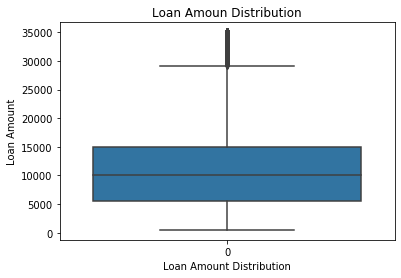

0.25     5500.0
0.50    10000.0
0.75    15000.0
0.90    22000.0
0.95    25000.0
0.97    28800.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [378]:
#Plotting Loan Amount Quantile Distribution
sns.boxplot(data['loan_amnt']).set(xlabel='Loan Amount Distribution', ylabel='Loan Amount')
plt.title("Loan Amoun Distribution")
plt.show()
quantile_loan_amnt = data.loan_amnt.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_loan_amnt

We see many outliers for loan amount. The IQR is 9500 (75th quartile-25th quartile).

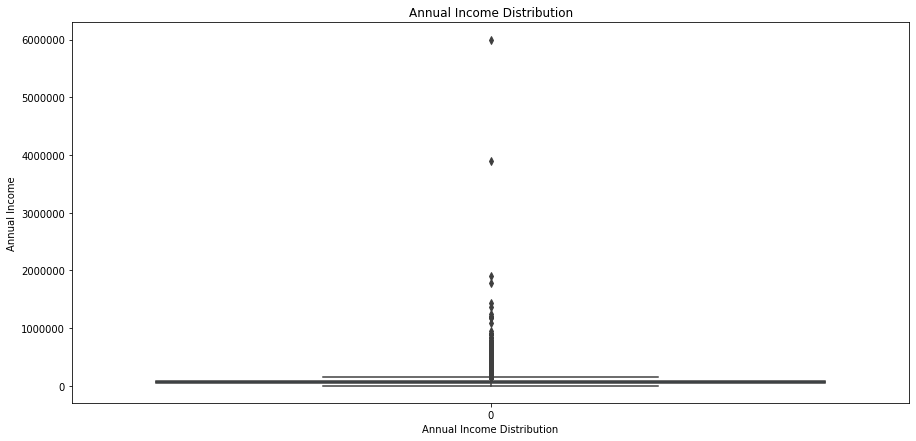

0.25     41004.00
0.50     60000.00
0.75     83000.00
0.90    116685.60
0.95    141998.80
0.97    165996.00
0.98    188083.68
0.99    235000.00
Name: annual_inc, dtype: float64

In [379]:
#Plotting Annual Income Quantile Distribution
plt.figure(figsize=(15,7))
sns.boxplot(data['annual_inc']).set(xlabel='Annual Income Distribution', ylabel='Annual Income')
plt.title("Annual Income Distribution")
plt.show()
quantile_annual_inc = data.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_annual_inc

We see many outliers for annual income. The IQR is 41996 (75th quartile-25th quartile).

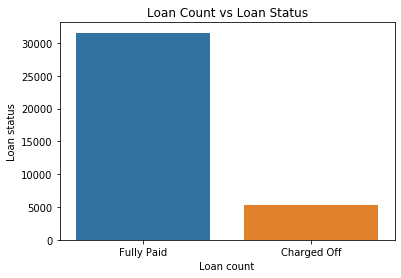

Charged Off Loans Percent 14.33%


In [380]:
#Plotting Loan Count vs Loan Status
sns.countplot(x='loan_status', data=data).set(xlabel='Loan count', ylabel='Loan status')
plt.title("Loan Count vs Loan Status")
plt.show()
print("Charged Off Loans Percent %.2f" % (data.loc[data['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(data))+'%')



Most of the loans are fully paid. Around 14% loans are defaulted.

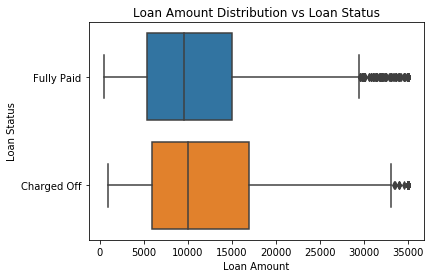

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,12236.347283,8103.456528,1000.0,6000.0,10000.0,16950.0,35000.0
Fully Paid,31566.0,10958.130584,7223.977380,500.0,5400.0,9600.0,15000.0,35000.0


In [381]:
#Plotting Loan Amount Distribution vs Loan Status
sns.boxplot(x=data['loan_amnt'], y=data['loan_status'], data=data).set(xlabel='Loan Amount', ylabel='Loan Status')
plt.title("Loan Amount Distribution vs Loan Status")
plt.show()
data.groupby('loan_status')['loan_amnt'].describe()

Loan Amount IQR for Defaulted loans is 10950 whereas for fully paid loan IQR is 9600.

#### Creating bins for numeric data to utilize them for categorical analysis.

In [382]:

#Changing numeric columns into bins
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['0%-5%','5%-10%','10%-15%','15%-20%','20%-25%'])
data['open_acc_groups'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['1-9','9-18','18-27','27-36','36-45'])
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=10,precision =0,labels =['1k-15k','15k-30k','30k-45k','45k-60k','60k-75k','75k-90k','90k-105k','105k-120k','120k-135k','135k-150k'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               36847 non-null  int64         
 1   term                    36847 non-null  object        
 2   int_rate                36847 non-null  float64       
 3   grade                   36847 non-null  object        
 4   sub_grade               36847 non-null  object        
 5   emp_length              36847 non-null  int64         
 6   home_ownership          36847 non-null  object        
 7   annual_inc              36847 non-null  float64       
 8   verification_status     36847 non-null  object        
 9   issue_d                 36847 non-null  object        
 10  loan_status             36847 non-null  object        
 11  purpose                 36847 non-null  object        
 12  addr_state              36847 non-null  object

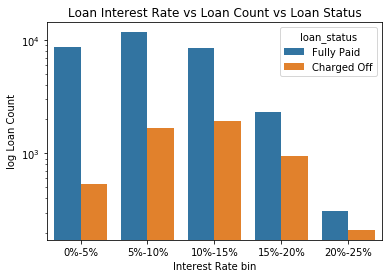

In [383]:
#Plotting Loan Interest Rate vs Loan Count vs Loan Status

sns.countplot(x='int_rate_groups', data=data,hue='loan_status').set_yscale("log")
plt.xlabel('Interest Rate bin')
plt.ylabel("log Loan Count")
plt.title("Loan Interest Rate vs Loan Count vs Loan Status")
plt.show()


Most of the fully paid loans lie in the interest rate 5-10% whereas for defaulted loans the interest lies in 10-15% range.
So we can say that most of the defaulted loans have higher interest rates compared to fully paid loans.

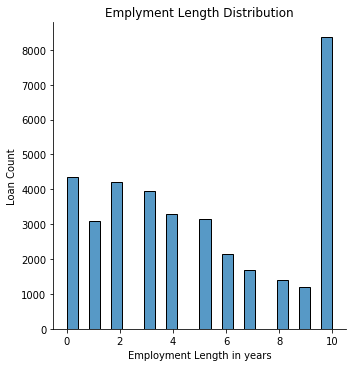

In [384]:
#Plotting Emplyment Length Distribution
sns.displot(data['emp_length']).set(xlabel='Employment Length in years',ylabel='Loan Count')
plt.title("Emplyment Length Distribution")
plt.show()

Most of the loans are taken by people having 10 or above years of employment.

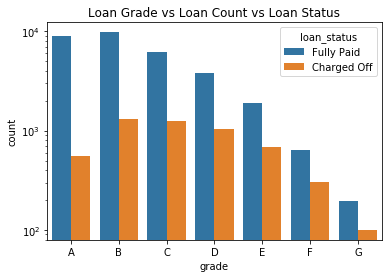

In [385]:
#Plotting Loan Grade vs Loan Count vs Loan Status
sns.countplot(x='grade', data=data,hue='loan_status',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']).set_yscale("log")
#.set(xlabel='Loan Grade', ylabel='Loan Count')
plt.title("Loan Grade vs Loan Count vs Loan Status")
plt.show()

Most fully paid loans are from A grade whereas for defaulted its from B.

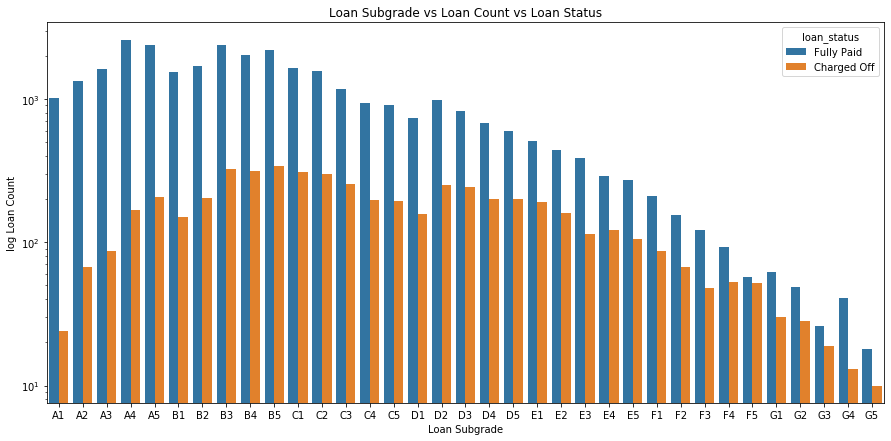

In [386]:
plt.figure(figsize=(15,7))
#Plotting Loan Subgrade vs Loan Count vs Loan Status
sns.countplot(x='sub_grade', data=data,hue='loan_status',order = ['A1','A2','A3','A4','A5',
                                                                  'B1','B2','B3','B4', 'B5', 
                                                                  'C1','C2','C3','C4','C5',
                                                                  'D1','D2','D3','D4','D5', 
                                                                  'E1','E2','E3','E4','E5', 
                                                                  'F1','F2','F3','F4','F5',
                                                                  'G1','G2','G3','G4','G5']).set_yscale("log")
plt.xlabel('Loan Subgrade')
plt.ylabel("log Loan Count")
plt.title("Loan Subgrade vs Loan Count vs Loan Status")
plt.show()


Most fully paid loans are from A4 subgrade whereas for defaulted its from B3.

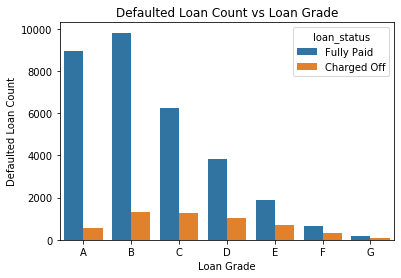

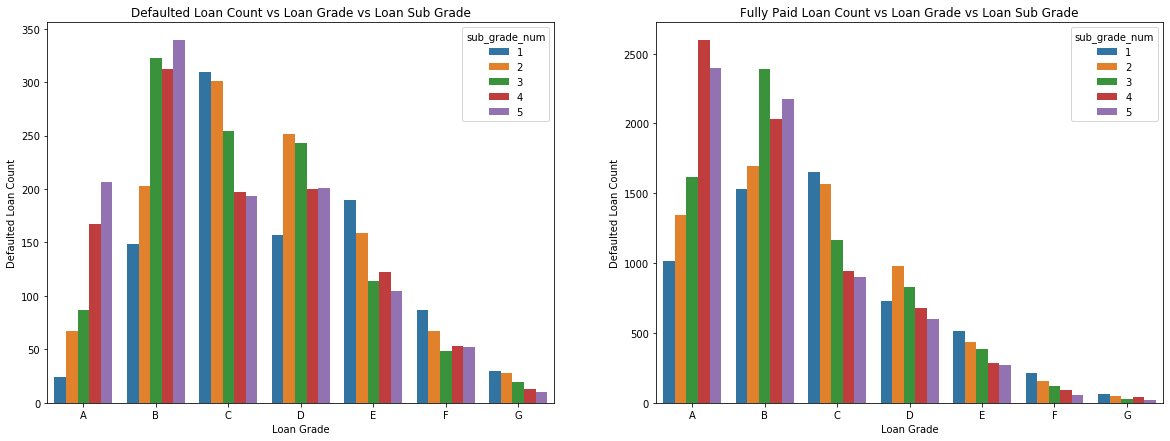

In [387]:
#Doing segmented analysis for Charged off loans
#Plotting Defaulted Loan Count vs Loan Grade
sns.countplot(x = 'grade', data = data, hue='loan_status',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']).set(xlabel='Loan Grade', ylabel='Defaulted Loan Count')
                
plt.title("Defaulted Loan Count vs Loan Grade")
plt.figure(figsize=(20,7))
#Plotting  Loan Count vs Loan Grade vs Loan Sub Grade with Loan Status
#Changing subgrade to numeric
data['sub_grade_num'] = pd.to_numeric(data.sub_grade.apply(lambda x : x[-1]))
plt.subplot(121)
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_num',data = data[data.loan_status == 'Charged Off']).set(xlabel='Loan Grade', ylabel='Defaulted Loan Count')
plt.title("Defaulted Loan Count vs Loan Grade vs Loan Sub Grade")
plt.subplot(122)
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_num',data = data[data.loan_status == 'Fully Paid']).set(xlabel='Loan Grade', ylabel='Defaulted Loan Count')
plt.title("Fully Paid Loan Count vs Loan Grade vs Loan Sub Grade")
plt.show()

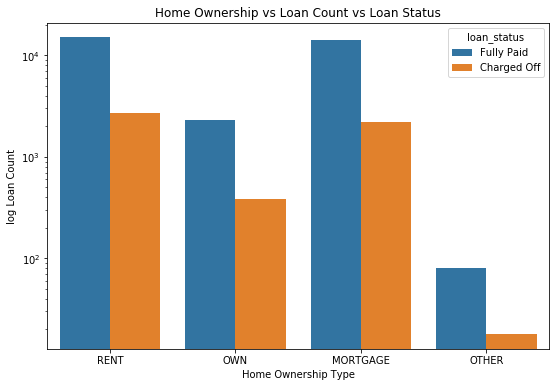

In [388]:
plt.figure(figsize=(9,6))
#Plotting Home Ownership vs Loan Count vs Loan Status
sns.countplot(x='home_ownership', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Home Ownership Type")
plt.ylabel("log Loan Count")
plt.title("Home Ownership vs Loan Count vs Loan Status")
plt.show()

For both fully paid loans as well as defaulted loans, more loans belong to Rent and Mortgage home ownerships.

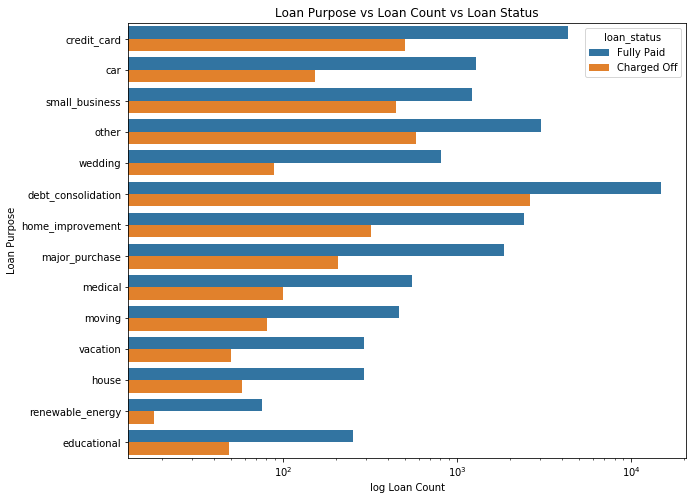

loan_status,Charged Off,Fully Paid,default%
purpose,,,
car,1115900,8626925,11.45
credit_card,6608850,49406800,11.80
debt_consolidation,35811575,183124175,16.36
educational,400200,1626225,19.75
home_improvement,3881775,27335800,12.43
house,730775,3753925,16.29
major_purchase,1911375,14758650,11.47
medical,866850,4368250,16.56
moving,501525,3102500,13.92


In [432]:
plt.figure(figsize=(10,8))
#Plotting Loan Purpose vs Loan Count vs Loan Status
sns.countplot(y ='purpose', data=data,hue='loan_status').set_xscale("log")
plt.ylabel("Loan Purpose")
plt.xlabel("log Loan Count")
plt.title("Loan Purpose vs Loan Count vs Loan Status")
plt.show()
pivot=pd.pivot_table(data=data,values='loan_amnt',columns='loan_status',index='purpose',aggfunc='sum')
pivot['default%']=round(pivot['Charged Off']*100/(pivot['Charged Off']+pivot['Fully Paid']),2)
pivot

- For both fully paid loans as well as defaulted loans, more loans used for debt consolidation.For defaulted loans this spike is more than other loan purposes.
- Small business seems to be problem area as almost 30% loans in this are defaulted.

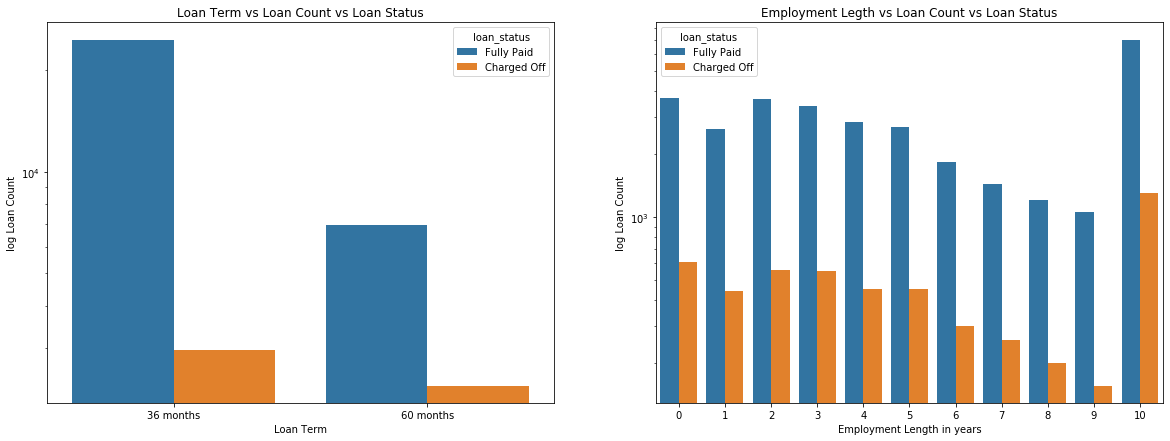

In [390]:
fig, ax = plt.subplots(figsize = (20,7))
plt.subplot(121)
#Plotting Loan Term vs Loan Count vs Loan Status
sns.countplot(x ='term', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Loan Term")
plt.ylabel("log Loan Count")
plt.title("Loan Term vs Loan Count vs Loan Status")
plt.subplot(122)
sns.countplot(x='emp_length', data=data,hue='loan_status').set_yscale("log")
#Plotting Employment Legth vs Loan Count vs Loan Status
plt.xlabel('Employment Length in years')
plt.ylabel("log Loan Count")
plt.title("Employment Legth vs Loan Count vs Loan Status")
plt.show()

For both fully paid loans as well as defaulted loans, more loans belong to 36 months loan term and with employment length of 10+ years.
For defaulted loans the spike for 36 months term and 10+ employment length is more compared to other groups.

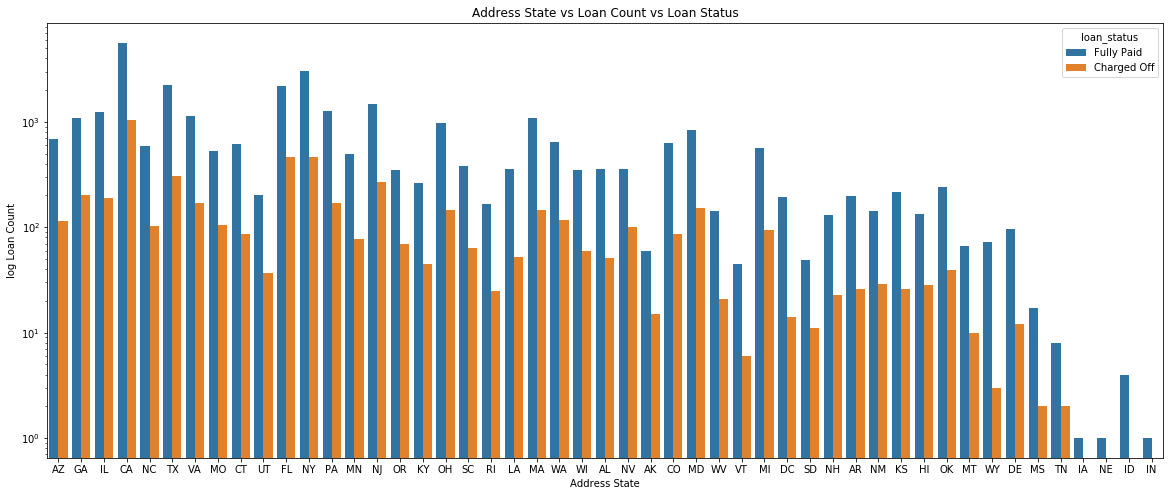

In [391]:
plt.figure(figsize=(20,8))
#Plotting Address State vs Loan Count vs Loan Status
sns.countplot(x ='addr_state', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Address State")
plt.ylabel("log Loan Count")
plt.title("Address State vs Loan Count vs Loan Status")
plt.show()

California has more number of loans-fully paid as well as defaulted loans-compared to other states.


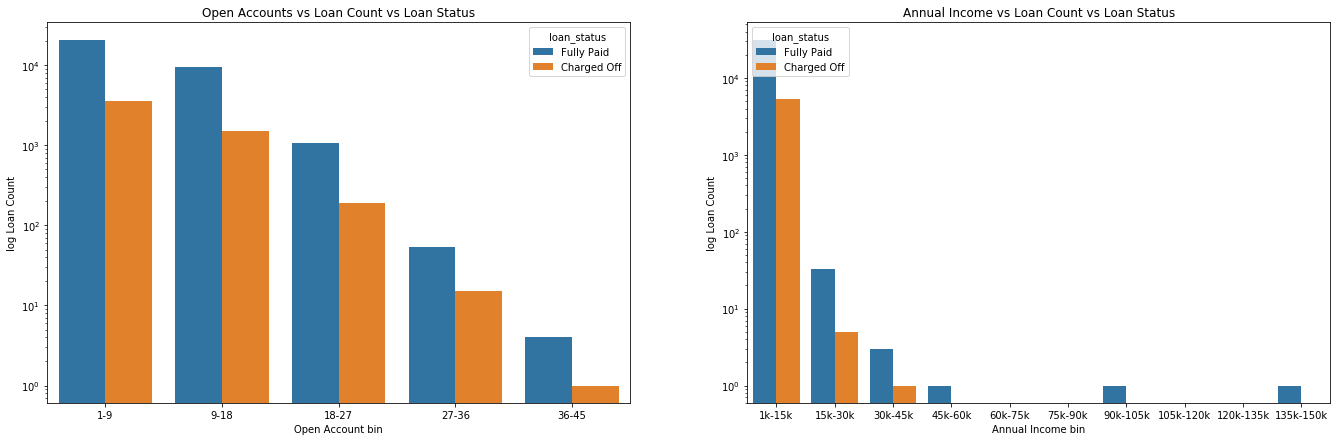

In [392]:
fig, ax = plt.subplots(figsize = (23,7))
plt.subplot(121)
#Plotting Open Accounts vs Loan Count vs Loan Status
sns.countplot(x='open_acc_groups', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Open Account bin")
plt.ylabel("log Loan Count")
plt.title("Open Accounts vs Loan Count vs Loan Status")
plt.subplot(122)
#Plotting Annual Income vs Loan Count vs Loan Status
sns.countplot(x='annual_inc_groups', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Annual Income bin")
plt.ylabel("log Loan Count")
plt.title("Annual Income vs Loan Count vs Loan Status")
plt.show()

Open accounts between 1 and 9 contribute more to fully paid loans as well as defaulted loans.
People with annual income between 1k-15k$ contribute more to loans (fully paid as well as defaulted), but the spike for defaulted is more compared to other income groups.


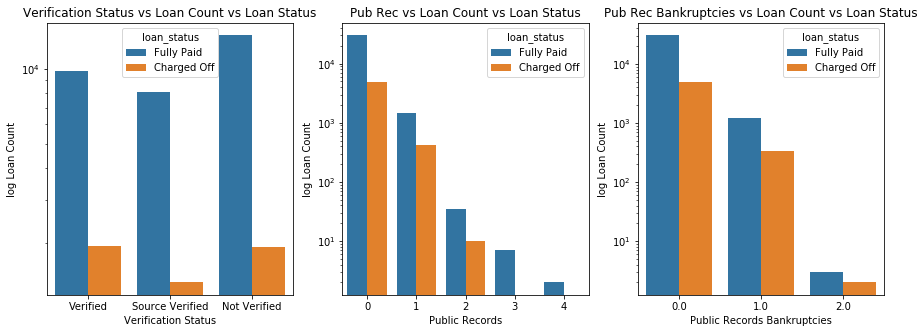

In [393]:
fig, ax = plt.subplots(figsize = (15,5))
plt.subplot(131)
#Plotting Verification Status vs Loan Count vs Loan Status
sns.countplot(x='verification_status', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Verification Status")
plt.ylabel("log Loan Count")
plt.title("Verification Status vs Loan Count vs Loan Status")
plt.subplot(132)
#Plotting Public Records vs Loan Count vs Loan Status
sns.countplot(x='pub_rec', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Public Records")
plt.ylabel("log Loan Count")
plt.title("Pub Rec vs Loan Count vs Loan Status")
plt.subplot(133)
#Plotting Public Record Bankruptcies vs Loan Count vs Loan Status
sns.countplot(x='pub_rec_bankruptcies', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Public Records Bankruptcies")
plt.ylabel("log Loan Count")
plt.title("Pub Rec Bankruptcies vs Loan Count vs Loan Status")
plt.show()

- Defaulted loans are least for source verified loans.
- More default loans happen with 0 public records and public recorded bankruptcies.

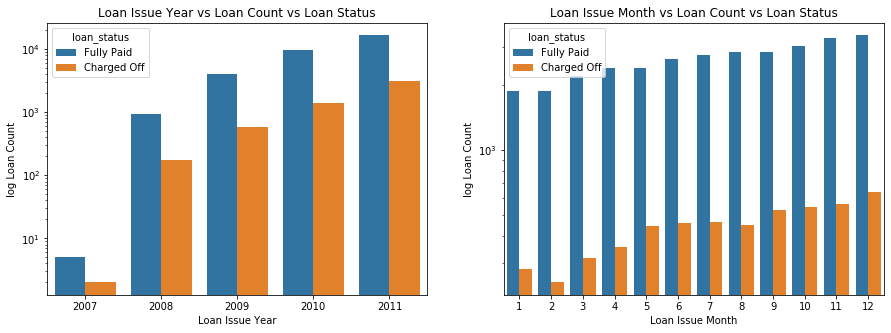

In [394]:
#Plotting Loan Issue Year vs Loan Count vs Loan Status
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x='issue_d_line_year', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Loan Issue Year")
plt.ylabel("log Loan Count")
plt.title("Loan Issue Year vs Loan Count vs Loan Status")
plt.subplot(122)
#Plotting Loan Issue Month vs Loan Count vs Loan Status
sns.countplot(x='issue_d_line_month', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Loan Issue Month")
plt.ylabel("log Loan Count")
plt.title("Loan Issue Month vs Loan Count vs Loan Status")
plt.show()

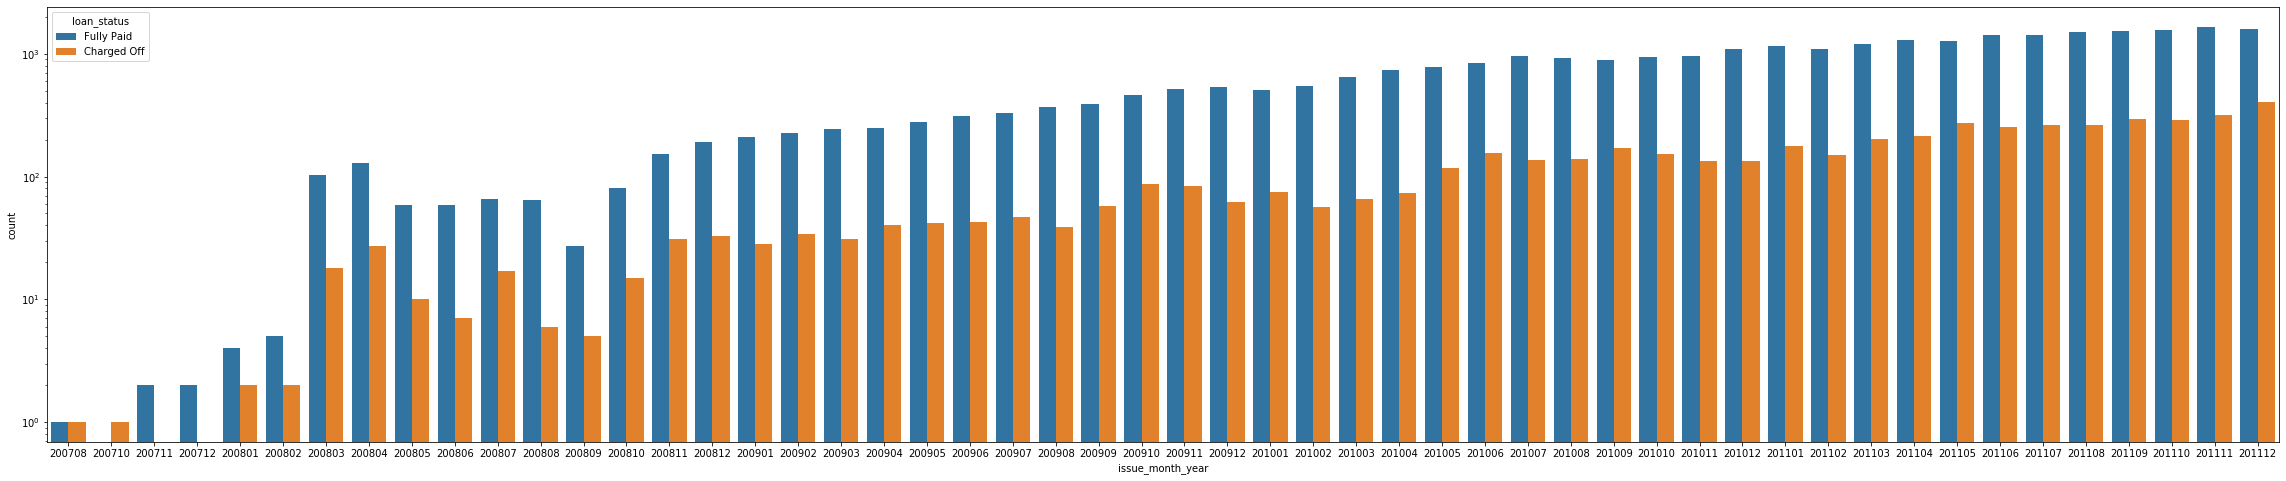

In [395]:
plt.figure(figsize=(40,8))
data['issue_month_year']=data.issue_d_line_year*100+data.issue_d_line_month
sns.countplot(x='issue_month_year', data=data,hue='loan_status').set_yscale("log")

-  Loan count increases during last three months i.e. Oct,Nov and Dec coninciding with holiday season and year end payments.
- In year 2011 spike is noticed in loan count and default loans ; can be linked to 2011-2012 financial turbulence in American markets.

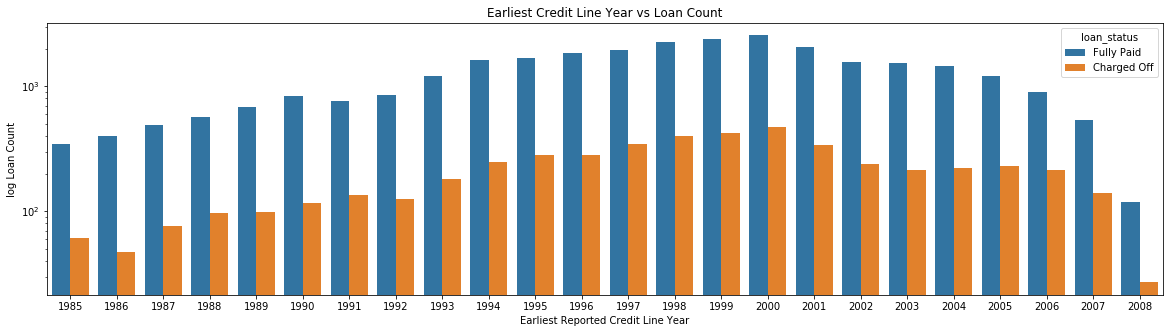

In [396]:
#Plotting Earliest Credit Line Year vs Loan Count
plt.figure(figsize=(20,5))
sns.countplot(x='earliest_cr_line_year', data=data[data['earliest_cr_line_year']>=1985],hue='loan_status').set_yscale("log")
plt.xlabel("Earliest Reported Credit Line Year")
plt.ylabel("log Loan Count")
plt.title("Earliest Credit Line Year vs Loan Count")
plt.show()


- People who got the credit line in recent years are more prone to default to on loans compared to those who got earlier.

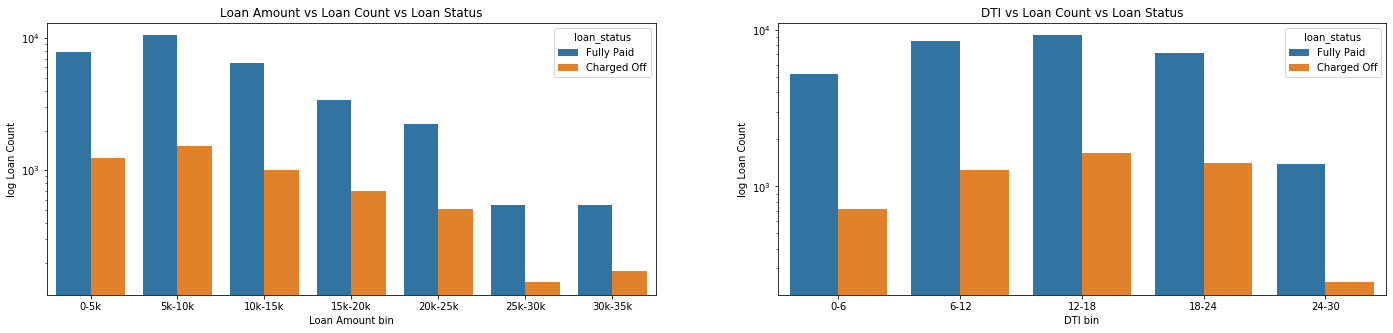

In [397]:
#Plotting Loan Amount vs Loan Count vs Loan Status
fig, ax = plt.subplots(figsize = (24,5))
plt.subplot(121)
sns.countplot(x='loan_amnt_groups', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("Loan Amount bin")
plt.ylabel("log Loan Count")
plt.title("Loan Amount vs Loan Count vs Loan Status")
plt.subplot(122)
#Plotting DTI vs Loan Count vs Loan Status
sns.countplot(x='dti_groups', data=data,hue='loan_status').set_yscale("log")
plt.xlabel("DTI bin")
plt.ylabel("log Loan Count")
plt.title("DTI vs Loan Count vs Loan Status")
plt.show()

- most loans for 5k to 10k and max default is happening in this range.
- DTI between 12 to 18 contribute to more loans and defaults.

In [398]:
#Changing categorical columns to numeric to get correlation by using lambda and user defined functions
data_charg_off=data.copy()
data_charg_off['loan_status_check']=data_charg_off.loan_status.apply(lambda x : 0 if x=='Fully Paid' else 1)
data_charg_off['term_check']=data_charg_off.term.apply(lambda x : 0 if x=='36 months' else 1)

def verification_check(x):
    if x =='Source Verified':
       return 0
    elif x =='Verified':
       return 1
    else:
       return 2


def grade_check(x):
    if x =='A':
       return 1
    elif x =='B':
       return 2
    elif x =='C':
       return 3
    elif x =='D':
       return 4
    elif x =='E':
       return 5
    elif x =='F':
       return 6
    else:
       return 7


def home_check(x):
    if x =='RENT':
       return 1
    elif x =='MORTGAGE':
       return 2
    elif x =='OWN':
       return 3
    else:
       return 4


def purpose_check(x):
    if x =='debt_consolidation':
       return 1
    elif x =='credit_card':
       return 2
    elif x =='home_improvement':
       return 3
    elif x =='major_purchase':
       return 4
    elif x =='small_business':
       return 5
    elif x =='car':
       return 6
    elif x =='wedding':
       return 7
    elif x =='moving':
       return 8
    elif x =='house':
       return 9
    elif x =='vacation':
       return 10
    elif x =='educational':
       return 11
    elif x =='renewable_energy':
       return 12
    elif x =='medical':
       return 13
    else:
       return 14





In [399]:
#Changing categorical columns to numeric to get correlation
data_charg_off['verification_status_check']=data_charg_off['verification_status'].apply(verification_check)
data_charg_off['grade_check']=data_charg_off['grade'].apply(grade_check)
data_charg_off['sub_grade_check']=(data_charg_off['grade_check']*10)+data_charg_off['sub_grade_num']
data_charg_off['home_check']=data_charg_off['home_ownership'].apply(home_check)
data_charg_off['purpose_check']=data_charg_off['purpose'].apply(purpose_check)
data_charg_off['addr_state']=data_charg_off['addr_state'].astype('category')
data_charg_off['addr_state_check']=data_charg_off['addr_state'].cat.codes

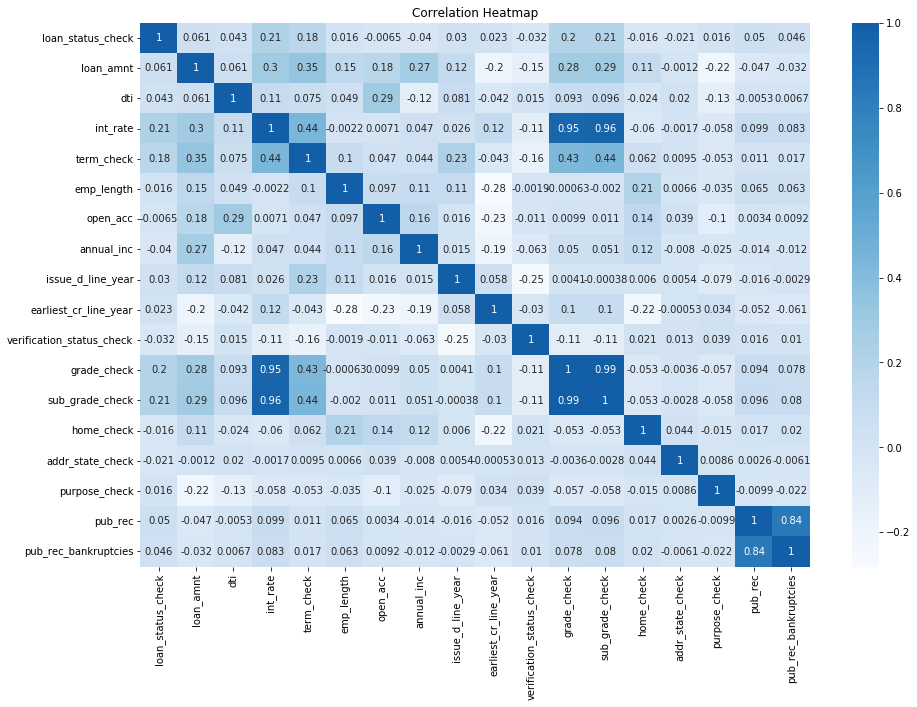

,loan_status_check,loan_amnt,dti,int_rate,term_check,emp_length,open_acc,annual_inc,issue_d_line_year,earliest_cr_line_year,verification_status_check,grade_check,sub_grade_check,home_check,addr_state_check,purpose_check,pub_rec,pub_rec_bankruptcies
loan_status_check,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False
loan_amnt,False,True,False,True,True,False,False,True,False,False,False,True,True,False,False,False,False,False
dti,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
int_rate,True,True,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False
term_check,False,True,False,True,True,False,False,False,True,False,False,True,True,False,False,False,False,False
emp_length,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
open_acc,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
annual_inc,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
issue_d_line_year,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
earliest_cr_line_year,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [400]:
#Genrating Correlation Heatmap for all the columns

plt.figure(figsize=(15,10))


cont_var= ['loan_status_check','loan_amnt', 'dti', 'int_rate','term_check','emp_length', 'open_acc','annual_inc',
           'issue_d_line_year','earliest_cr_line_year','verification_status_check','grade_check','sub_grade_check',
           'home_check','addr_state_check','purpose_check','pub_rec','pub_rec_bankruptcies']
corr = data_charg_off[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5,cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


corr>0.2

### Bivariate Analysis
#### Using correalation > 0.2 for Bivariate Analysis

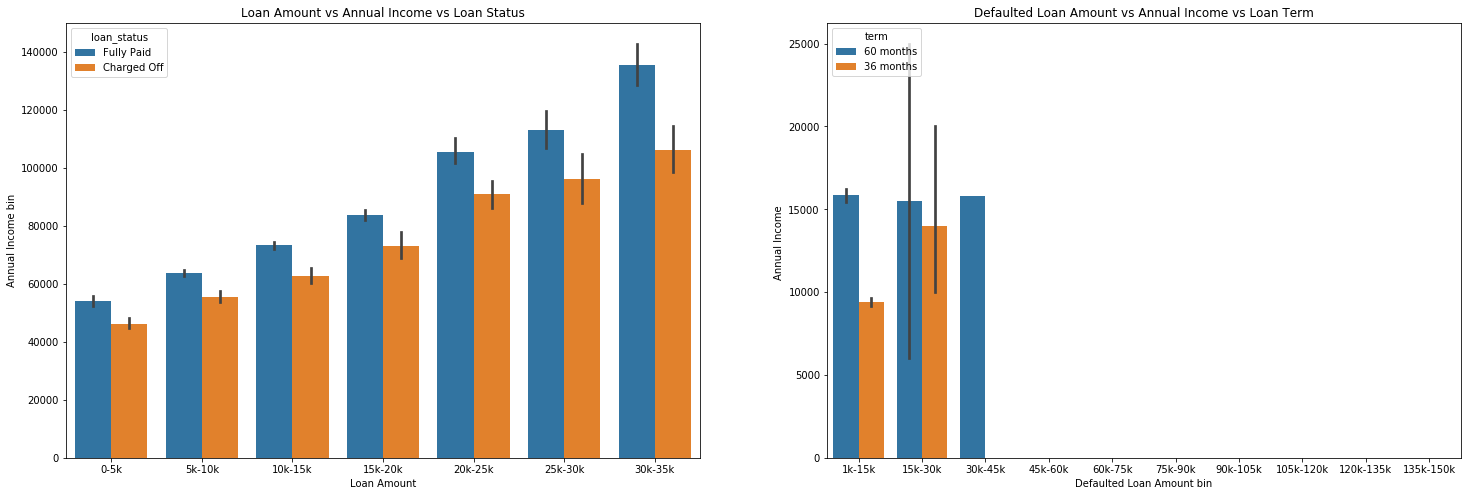

In [414]:
#Finding relationship between Loan Amount,Annual Income and Loan Status
fig, ax = plt.subplots(figsize = (25,8))
plt.subplot(121)
sns.barplot(data =data,x='loan_amnt_groups', y='annual_inc', hue ='loan_status')
plt.xlabel("Loan Amount")
plt.ylabel("Annual Income")
plt.title("Loan Amount vs Annual Income vs Loan Status")
plt.subplot(122)
#Finding relationship between Defaulted Loan Amount,Annual Income and Loan Term
sns.barplot(data =data[data['loan_status']=='Charged Off'],x='annual_inc_groups', y='loan_amnt', hue ='term')
plt.xlabel("Defaulted Loan Amount bin")
plt.ylabel("Annual Income ")
plt.title("Defaulted Loan Amount vs Annual Income vs Loan Term")
plt.show()

- People with higher annual income have access to higher loan amounts.
- Most defaults are happening for 36 months loan term.

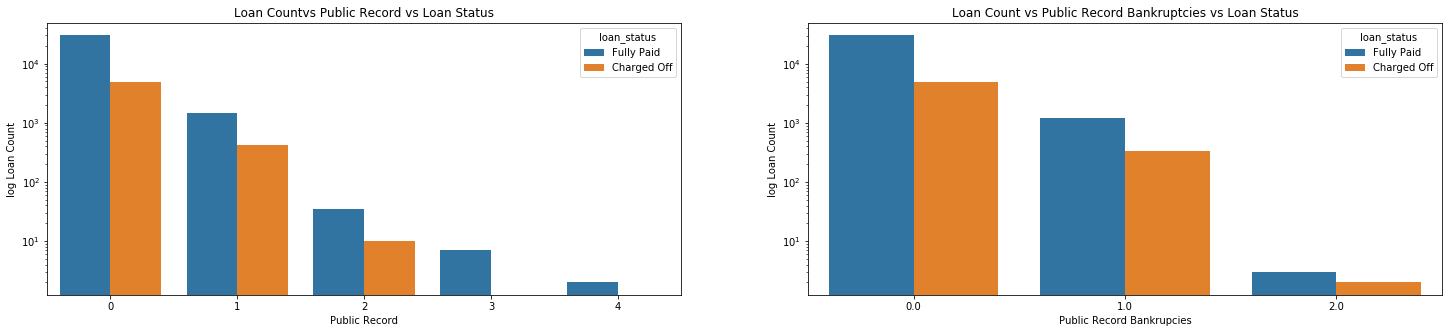

In [402]:
fig, ax = plt.subplots(figsize = (25,5))
#Finding relationship between Loan Count,Public Record and Loan Status
plt.subplot(121)
sns.countplot(x='pub_rec', data=data, hue='loan_status').set_yscale("log")
plt.xlabel("Public Record")
plt.ylabel("log Loan Count")
plt.title("Loan Countvs Public Record vs Loan Status")
plt.subplot(122)
#Finding relationship between Loan Count,Public Record Bankruptcies and Loan Status
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status').set_yscale("log")
plt.xlabel("Public Record Bankrupcies")
plt.ylabel("log Loan Count")
plt.title("Loan Count vs Public Record Bankruptcies vs Loan Status")
plt.show()


Loans with 0 public records and Public recorded bankruptcies have more defaulted loans.

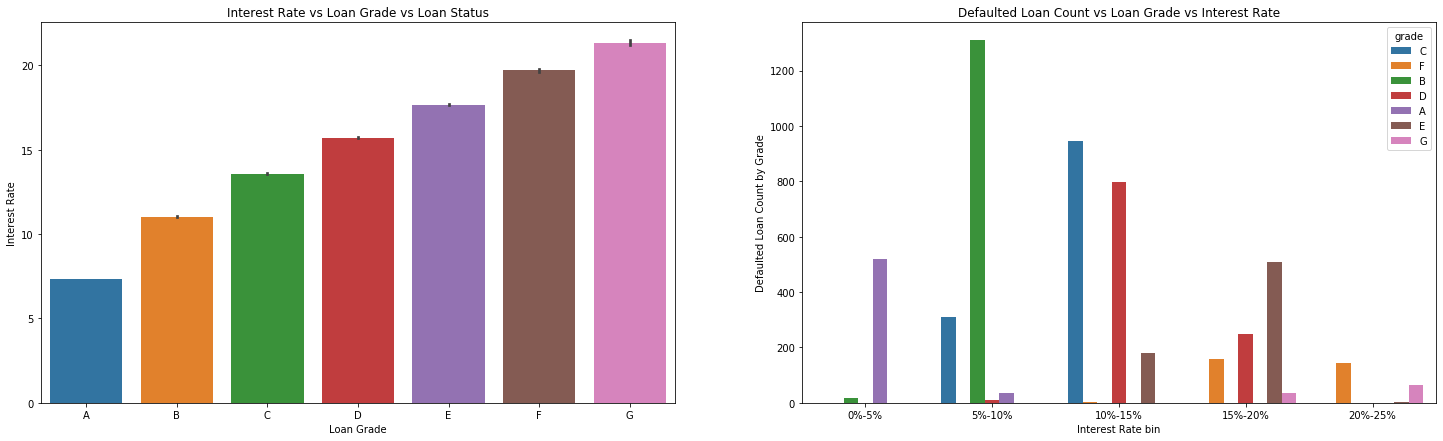

In [403]:
#Finding relationship between Interest Rate,Loan Grade and Loan Status
fig, ax = plt.subplots(figsize = (25,7))
plt.subplot(121)
sns.barplot(data =data,x='grade', y='int_rate',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate")
plt.title("Interest Rate vs Loan Grade vs Loan Status")
plt.subplot(122)
#Finding relationship between Defaulted Loan Count,Loan Grade and Interset Rate
sns.countplot(data =data[data['loan_status']=='Charged Off'],x='int_rate_groups',  hue ='grade')
plt.xlabel("Interest Rate bin")
plt.ylabel("Defaulted Loan Count by Grade")
plt.title("Defaulted Loan Count vs Loan Grade vs Interest Rate")
plt.show()

- Higher grade attracts more interest rate.
- Most defaulted loans are from B grade and between 10% to 15% interest rates.`

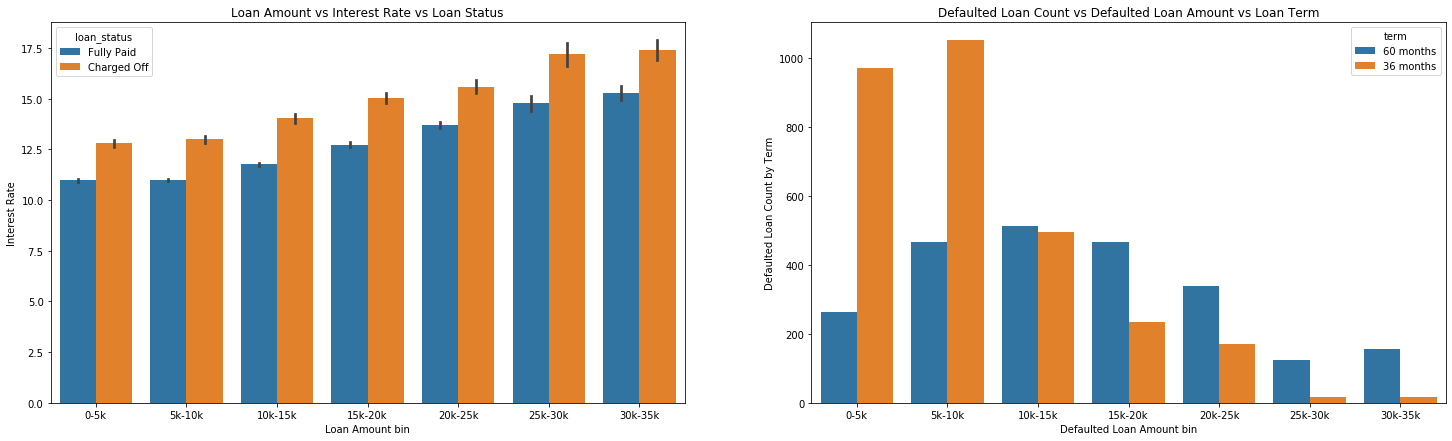

In [404]:
#Finding relationship between Loan Amount,Interest Rate and Loan Status
fig, ax = plt.subplots(figsize = (25,7))
plt.subplot(121)
sns.barplot(data =data,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.xlabel("Loan Amount bin")
plt.ylabel("Interest Rate")
plt.title("Loan Amount vs Interest Rate vs Loan Status")
plt.subplot(122)
#Finding relationship between Defaulted Loan Count,Defaulted Loan Amount and Loan Term
sns.countplot(data =data[data['loan_status']=='Charged Off'],x='loan_amnt_groups',  hue ='term')
plt.xlabel("Defaulted Loan Amount bin")
plt.ylabel("Defaulted Loan Count by Term")
plt.title("Defaulted Loan Count vs Defaulted Loan Amount vs Loan Term")
plt.show()

- Higher loan amounts attract higher interest rates contributing to more defaulted loans.
- Most defaulted loans are for shorter period-36 months- for loan amounts between 5k to 10k.

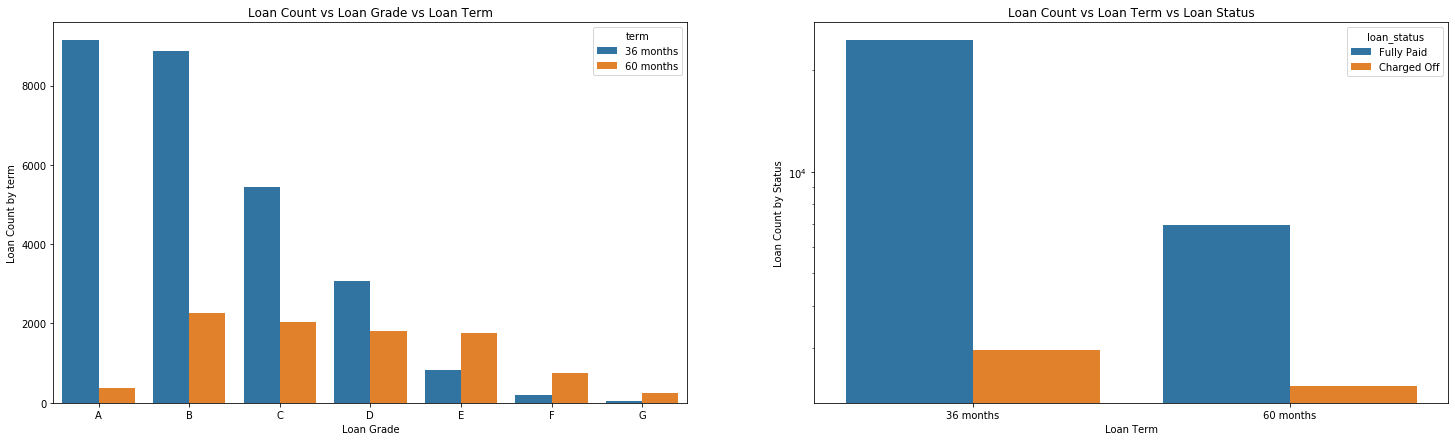

In [405]:
#Finding relationship between Loan Amount,Loan Grade and Loan Term
fig, ax = plt.subplots(figsize = (25,7))
plt.subplot(121)
sns.countplot(x='grade',  hue="term", data=data,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel("Loan Grade")
plt.ylabel("Loan Count by term")
plt.title("Loan Count vs Loan Grade vs Loan Term")
plt.subplot(122)
#Finding relationship between Loan Amount,Loan Term and Loan Status
sns.countplot(x='term',  hue="loan_status", data=data).set_yscale("log")
plt.xlabel("Loan Term")
plt.ylabel("Loan Count by Status")
plt.title("Loan Count vs Loan Term vs Loan Status")
plt.show()

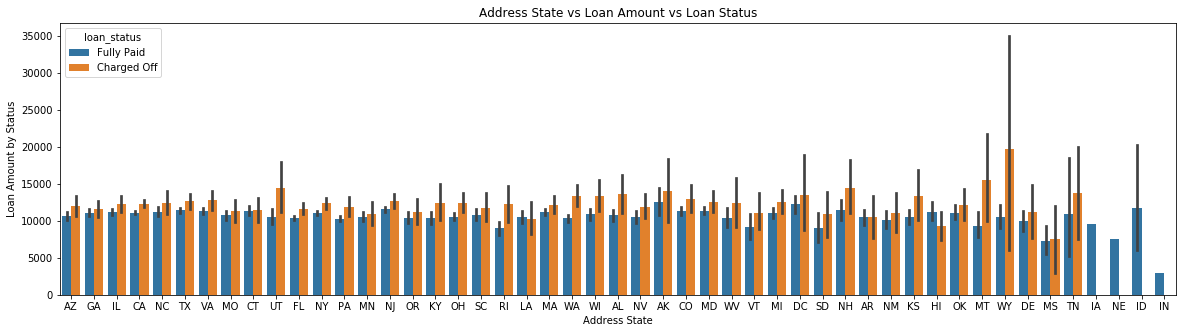

In [406]:
#Finding relationship between Address State,Loan Amount and Loan Status
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=data)
plt.xlabel("Address State")
plt.ylabel("Loan Amount by Status")
plt.title("Address State vs Loan Amount vs Loan Status")
plt.show()

Wyoming contributes the most to default for higher loan amounts compared to other states.

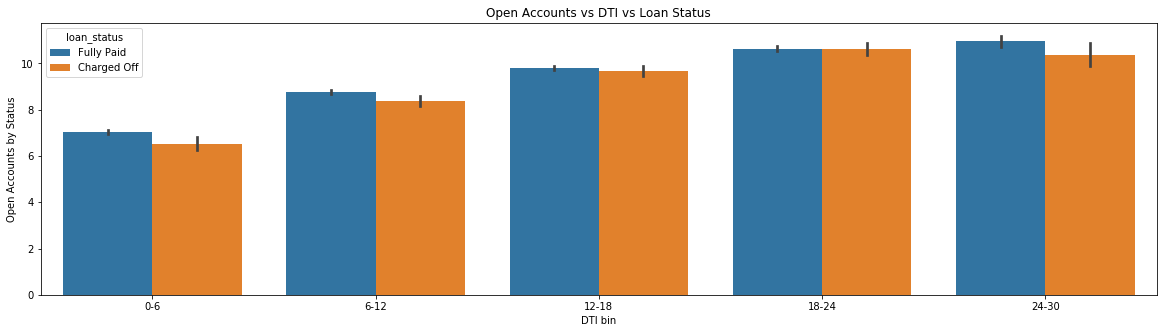

dti_groups
0-6      11.190662
6-12     11.720024
12-18    12.245703
18-24    12.630420
24-30    11.416489
Name: int_rate, dtype: float64

In [413]:
#Finding relationship between Open Accounts,DTI and Loan Status
plt.figure(figsize=(20,5))
sns.barplot(x='dti_groups', y='open_acc', hue='loan_status',data=data)
plt.xlabel("DTI bin")
plt.ylabel("Open Accounts by Status")
plt.title("Open Accounts vs DTI vs Loan Status")
plt.show()
data.groupby('dti_groups').int_rate.mean()

More open accounts tend to increase in DTI and this contributes to more interest rates.

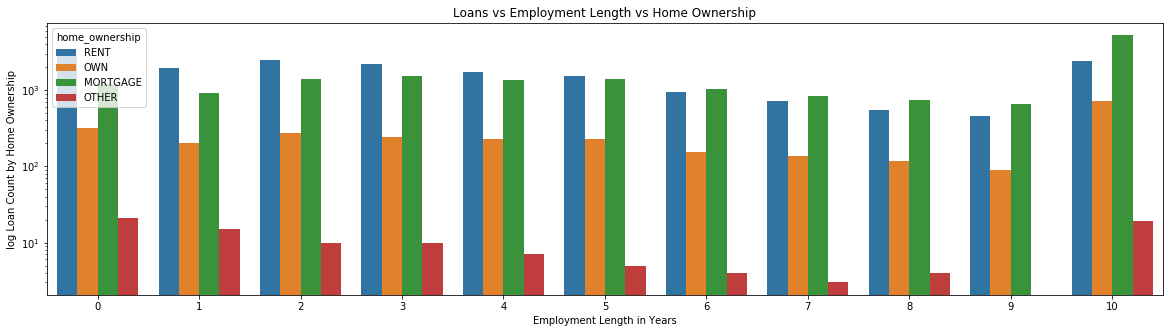

In [408]:
#Finding relationship between Loans,Employment Length and Home Ownership
plt.figure(figsize=(20,5))
sns.countplot(x='emp_length', hue='home_ownership',data=data).set_yscale("log")
plt.xlabel("Employment Length in Years")
plt.ylabel("log Loan Count by Home Ownership")
plt.title("Loans vs Employment Length vs Home Ownership")
plt.show()

With increase in employment years the house ownership tends to increase for Ownership probably as mortgage homes are converted to self ownership.

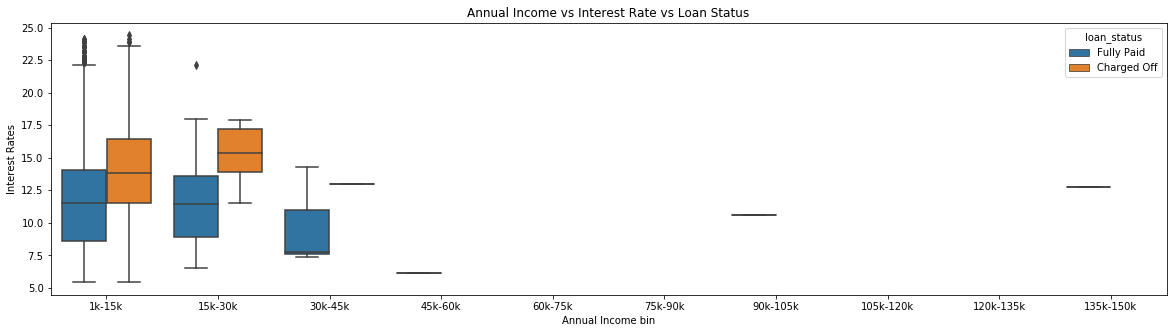

In [409]:
#Finding relationship between Annual Income,Interest Rate and Loan Status
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='annual_inc_groups',y='int_rate',hue='loan_status')
plt.xlabel("Annual Income bin")
plt.ylabel("Interest Rates")
plt.title("Annual Income vs Interest Rate vs Loan Status")
plt.show()

Defaulted loans have more interest rate compared to fully paid loans for the same Annual income group. This can be a good indicator in identifying the probable defaults.

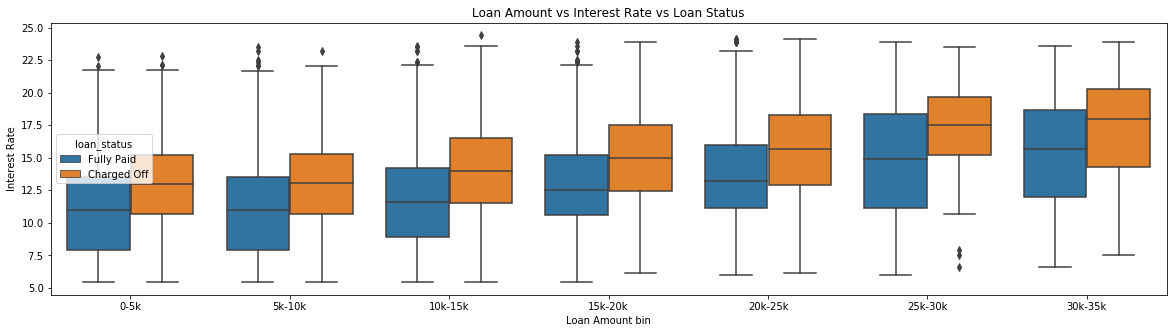

In [415]:
#Finding relationship between Loan Amount,Interest Rate and Loan Status
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='loan_amnt_groups',y='int_rate',hue='loan_status')
plt.xlabel("Loan Amount bin")
plt.ylabel("Interest Rate")
plt.title("Loan Amount vs Interest Rate vs Loan Status")
plt.show()

Defaulted loans have more interest rate compared to fully paid loans for the same Loan amount group. This can be a good indicator in identifying the probable defaults.

#### Obsevations:
- Lending Club should be wary of the loans where the purpose is Small Business as the percentage of a loan being charged off is almost 30%
- Lending Club should consider accepting more loans from applicants whose annual income is greater than 30K as their probablity of charge off is minimum.
- Lending Club should consider accepting more loans from people with own house ownership.
- Lending Club should consider accepting more loans from people who are source verified.
- The number of loan are increasing with each passing year which is good for Lending Club.The last months of the year are important as most of the loans are either fully paid or defaulted at that time.
- Lending Club should consider accepting more loans of grade A than B as B contributes more to defaulted loans due to higher interest rates.
- Higher interest rates and less loan term is contributing to defaulted loans so Lending Club should look at the grades for loans before accepting as loan grade is proportional to term and interest rates.
- Wyoming is contributing to higer defaults for higher loan amount so maybe Lending Club shoulf look at the spike.
